In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
merged_df = pd.read_csv('merged_df.csv', index_col='TIME')

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24274 entries, 2021-03-20 00:00:00 to 2024-01-30 16:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ACTUAL_MW  24274 non-null  float64
 1   DAM_MW     24274 non-null  float64
 2   2DA_MW     24274 non-null  float64
 3   TEMP_F     24274 non-null  float64
dtypes: float64(4)
memory usage: 948.2+ KB


In [5]:
#checking index
type(merged_df.index)

pandas.core.indexes.base.Index

In [6]:
#converting index to datetime
merged_df.index = pd.to_datetime(merged_df.index)


type(merged_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
merged_df.isna().sum()

ACTUAL_MW    0
DAM_MW       0
2DA_MW       0
TEMP_F       0
dtype: int64

In [8]:
merged_df.duplicated().sum()

40

In [9]:
duplicated_rows = merged_df[merged_df.duplicated()]

duplicated_rows.head()

,ACTUAL_MW,DAM_MW,2DA_MW,TEMP_F
TIME,,,,
2021-11-07 01:00:00,237.0,236.0,236.3,53.06
2021-11-07 01:00:00,237.0,236.0,236.3,53.06
2021-11-07 01:00:00,237.0,236.0,236.3,53.06
2021-11-07 01:00:00,237.0,236.0,236.3,53.06
2021-11-07 01:00:00,237.0,236.0,236.3,53.06


In [10]:
#drop duplicated rows
merged_df.drop_duplicates(inplace=True)

In [11]:

duplicated_index = merged_df.index.duplicated()

duplicated_index.sum()

5

In [12]:
merged_df = merged_df[~merged_df.index.duplicated(keep='first')]


In [13]:

duplicated_index = merged_df.index.duplicated()

duplicated_index.sum()

0

In [14]:
merged_df[:24]

,ACTUAL_MW,DAM_MW,2DA_MW,TEMP_F
TIME,,,,
2021-03-20 00:00:00,255.0,250.29,249.82,50.00
2021-03-20 01:00:00,248.0,240.09,239.51,48.02
2021-03-20 02:00:00,243.0,233.52,232.88,44.06
2021-03-20 03:00:00,242.0,231.43,230.74,42.08
2021-03-20 04:00:00,245.0,233.31,232.54,42.08
2021-03-20 05:00:00,253.0,239.19,238.41,42.98
2021-03-20 06:00:00,263.0,247.39,246.54,42.08
2021-03-20 07:00:00,266.0,250.64,249.85,41.00
2021-03-20 08:00:00,263.0,253.64,253.07,42.98


In [15]:
full_time_index = pd.date_range(start=merged_df.index.min(), end=merged_df.index.max(), freq='H')

full_time_index.shape[0] - merged_df.shape[0]


892

In [16]:
merged_df_reindexed = merged_df.reindex(full_time_index)
missing_timestamps = merged_df_reindexed[merged_df_reindexed.isna().all(axis=1)]

daily_missing = missing_timestamps.resample('D').apply(lambda x: x.isna().sum())

daily_missing.sort_values(by=[col for col in daily_missing.columns], ascending=False)

,ACTUAL_MW,DAM_MW,2DA_MW,TEMP_F
2021-03-23,24,24,24,24
2021-03-24,24,24,24,24
2021-03-25,24,24,24,24
2021-12-05,24,24,24,24
2022-01-05,24,24,24,24
...,...,...,...,...
2024-01-14,0,0,0,0
2024-01-15,0,0,0,0
2024-01-16,0,0,0,0
2024-01-17,0,0,0,0


<Axes: xlabel='TIME'>

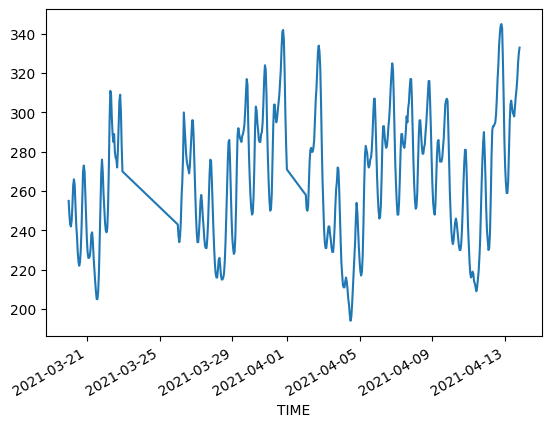

In [17]:
merged_df['ACTUAL_MW'][:500].plot()

In [18]:
pd.set_option('display.max_rows', None)  # Be cautious with this, especially for very large DataFrames
display(daily_missing)
pd.reset_option('display.max_rows')  # Reset to default


,ACTUAL_MW,DAM_MW,2DA_MW,TEMP_F
2021-03-23,24,24,24,24
2021-03-24,24,24,24,24
2021-03-25,24,24,24,24
2021-03-26,0,0,0,0
2021-03-27,0,0,0,0
2021-03-28,0,0,0,0
2021-03-29,0,0,0,0
2021-03-30,0,0,0,0
2021-03-31,0,0,0,0
2021-04-01,23,23,23,23


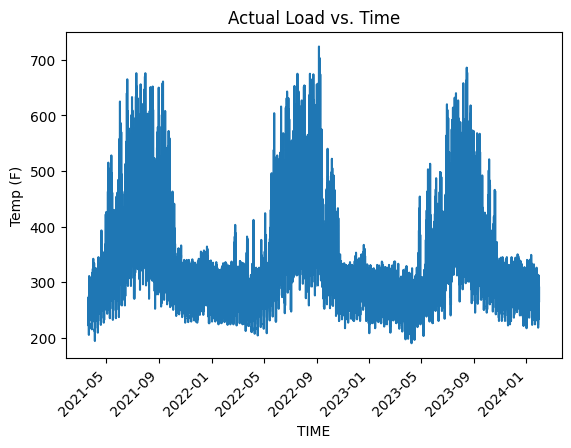

In [19]:
merged_df['ACTUAL_MW'].plot()
plt.xticks(rotation=45)
plt.title('Actual Load vs. Time')
plt.ylabel('Temp (F)')
plt.show()

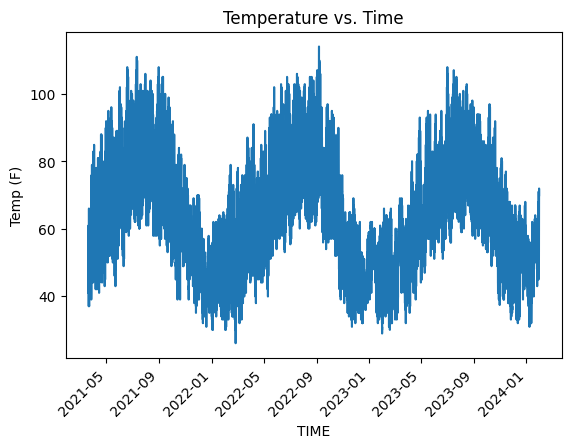

In [20]:
merged_df['TEMP_F'].plot()
plt.xticks(rotation=45)
plt.title('Temperature vs. Time')
plt.ylabel('Temp (F)')
plt.show()

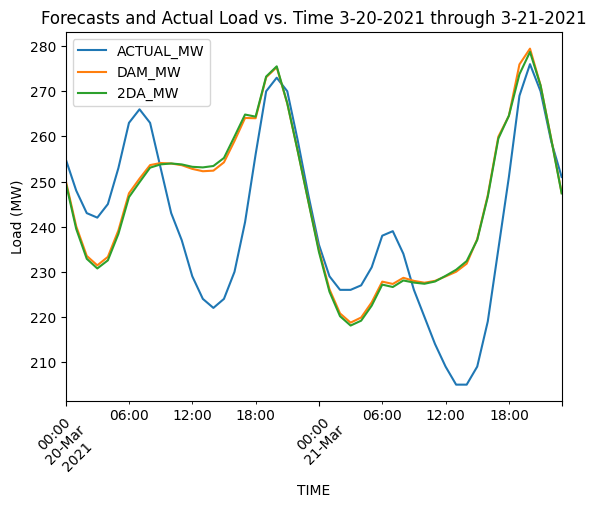

In [21]:
merged_df['ACTUAL_MW'][:48].plot(legend='ACTUAL')
merged_df['DAM_MW'][:48].plot(legend='DAM FORECAST')
merged_df['2DA_MW'][:48].plot(legend='2DA FORECAST')

plt.legend()
plt.xticks(rotation=45)
plt.title('Forecasts and Actual Load vs. Time 3-20-2021 through 3-21-2021')
plt.ylabel('Load (MW)')
plt.show()